# Căutarea informată. Algoritmul A*

Algoritmul A* se foloseste pentru a gasi un drum de cost minim de la un nod-start la un nod-scop intr-un graf cu muchii/arce ponderate (cu costuri).

Datele de intrare:

- graful (nodurile, muchiile/arcele impreuna cu costurile lor)
- nodul din care incepe cautarea (nodul-start)
- Un scop dat sub forma unei conditii pe care trebuie sa o indeplineasca nodul cautat (se poate oferi chiar nodul propriu-zis, conditia fiind relatia de egalitate cu acest nod). Vom numi mai departe nodul care indeplineste c
- O estimare (**euristica**) a costului de la fiecare nod din graf la nodul (nodurile) scop.

Notatii:

- `f` - costul unui drum
- `f̂` - costul estimat al unui drum
- `g(nod_c)` - costul de la nodul start la un nod curent, `nod_c`, din drum
- `h(nod_c)` - costul de la nodul curent la nodul scop pe un anumit drum
- `ĥ(nod_c)` - costul estimat de la nodul curent la nodul scop

Pentru un drum dat `D`, avem formula: `fD=gD(nod_c)+hD(nod_c)`, unde `nod_c` e un nod din drumul `D`.

Deoarece pe parcursul construirii arborelui de parcurgere nu cunoastem costul adevarat de la nodul curent la nodul scop (graful fiind descoperit pe masura ce e parcurs), ne vom folosi in algoritm de formula costului estimat: `f̂D=gD(nod_c)+ĥD(nod_c)`.

Spunem ca euristica `ĥ` este **admisibila** daca indeplineste conditia: `ĥ(nod)≤h(nod)`

Regula de consistenta: Avand un arc `n1->n2`, euristica calculata in nodul `n1` trebuie sa fie mai mica sau egala cu costul arcului `n1->n2` adunat la euristica nodului `n2`
`ĥ(n1)≤ cost(n1->n2)+ĥ(n2)`

Consideram ca avem graful cu muchii ponderate, de mai jos:

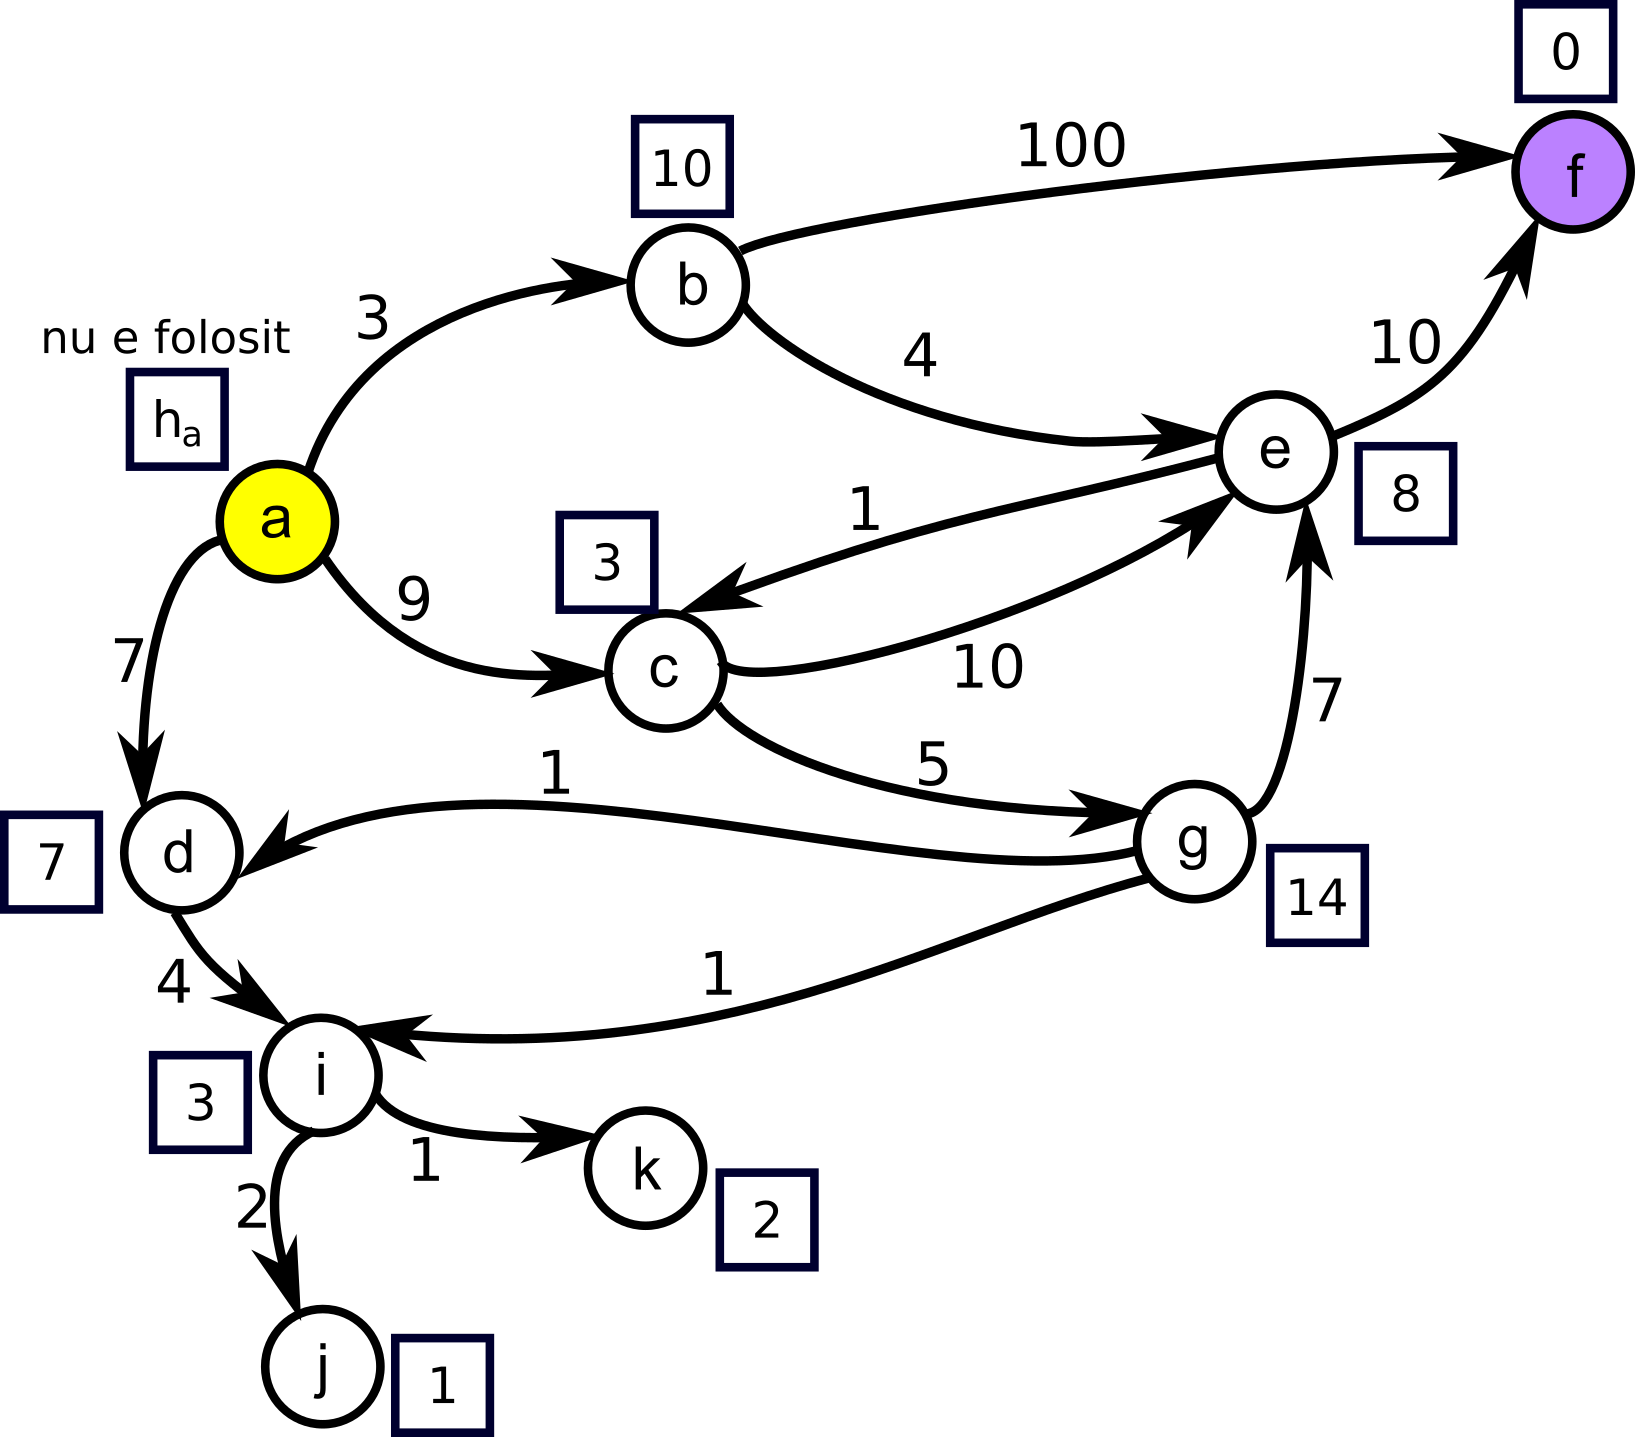

**Pasii algoritmului**

Se considera doua liste: OPEN (cu nodurile descoperite care inca nu au fost expandate) si CLOSED (cu nodurile descoperite si expandate).

Pasii de mai jos sunt preluati din cartea Aspecte ale Cautarii si Reprezentarii Cun ostintelor in Inteligenta Artificiala *(BALCAN Maria Florina, HRISTEA Florentina, Editura Universitatii din Bucuresti, 2004)*:

1. In lista open se pune la inceput doar nodul de pornire.
2. Initial lista closed e vida
3. cat timp lista open nu e vida se executa repetitiv pasii urmatori:
- se extrage primul nod, n, din lista open si se pune in closed
- daca nodul n este nodul scop, oprim cautarea si afisam drumul de la nodul-start pana la n
- extindem nodul n, obtinand succesorii lui in graf. Nu se vor lua in considerare succesorii care se afla in drumul de la nodul start la n. Toti succesorii il au ca parinte pe n. Toti succesorii care nu se afla deja in open sau closed sunt inserati in lista open astfel incat fie in continuare ordonata dupa f. Daca sunt doua noduri cu acelasi f, se aseaza inainte nodul cu g-ul mai mare.
- Pentru succesorii care sunt deja in open sau closed, in cazul in care pentru drumul care trece prin n, s-a obtinut un f mai mic, li se schimba parintele la n, si li se actualizeaza f-ul, iar nodurile din open sunt repozitionate in lista astfel incat sa ramana ordonata crescator dupa f.
- Pentru nodurile din closed (care au fost deja expandate) ar trebui refacut calculul pentru nodurile succesoare lor, prin urmare, cel mai simplu este sa le readaugam in open).


**Implementare (general)**

Pentru implementare putem considera niste clase ajutatoare, care ar fi adaptate la particularitatile problemei curente rezolvate cu A*.

Clasa `NodParcurgere` reprezinta clasa prin care se memoreaza informatiile despre nodurile din arborele de parcurgere. Poate avea urmatoarele proprietati:

- nod - referinta catre nodul corespunzator din graf
- parinte - referinta catre nodul-parinte din arbore. Pentru radacina arborelui, parintele va avea valoarea None.
- g - costul de la radacina arborelui pana la nodul curent
- f - costul estimat pentru drumul care porneste de la radacina si trece prin nodul curent
- expandat - o proprietate optionala (booleana). O putem folosi in locul listei closed
si urmatoarele metode:

- `expandeaza` - care va returna o lista cu toti succesorii posibili ai nodului curent
- `test_scop` -care testeaza daca nodul e nod scop

Clasa `Nod` se refera la nodurile efectiv aflate in graf si ar trebui sa aiba minim proprietatile:

- info: informatia nodului
- h - estimarea facuta pentru nod

Clasa `Problema` care contine datele particulare ale problemei.



**Pseudocod**

      Initial lista open e vida
      Cream primul nod din arborele de parcurgere corespunzator nodului de start np_start
      Punem nodul np_start in lista open
      Cat timp (open nu e vid) repetam:
          extragem primul nod din open si il punem in variabila nod_curent
          daca nod_curent indeplineste conditia scop
              afisam drum
              oprim cautarea
          expandez nod_curent
          pentru fiecare succesor s:
              nod_nou=None
              daca s nu apartine drumului lui nod_curent
                  daca s e in open
                      daca f-ul nodului din open e mai mare decat f-ul gasit pentru s
                          scoate nodul vechi din open
                          seteaza pentru s parintele, g-ul si f-ul
                          seteaza nod_nou=s
                      daca a fost expandat(closed)
                          seteaza pentru s parintele, g-ul si f-ul
                          ca sa adaug nodul in open (pentru a fi reexpandat) setez nod_nou=s
              daca nod_nou contine un nod de inserat
                  pune nod_nou in open astfel incat open sa ramana ordonat crescator dupa f

# Implementari

In [1]:
#informatii despre un nod din arborele de parcurgere (nu din graful initial)
class NodParcurgere:
    graf=None #static
    def __init__(self, id, info, parinte, cost, h):
        self.id=id # este indicele din vectorul de noduri
        self.info=info
        self.parinte=parinte #parintele din arborele de parcurgere
        self.g=cost #costul de la radacina la nodul curent
        self.h=h
        self.f=self.g+self.h

    # definire operatori pt ex 3
    def __lt__(self, b):
       return (self.f < b.f) or (self.f == b.f and self.g > b.g)
    def __eq__(self, b):
       return  self.f == b.f and self.g == b.g

    def obtineDrum(self):
        l=[self.info]
        nod=self
        while nod.parinte is not None:
            l.insert(0, nod.parinte.info)
            nod=nod.parinte
        return l
        
    def afisDrum(self): #returneaza si lungimea drumului
        l=self.obtineDrum()
        print(("->").join(l))
        print("Cost: ",self.g)
        return len(l)


    def contineInDrum(self, infoNodNou):
        nodDrum=self
        while nodDrum is not None:
            if(infoNodNou==nodDrum.info):
                return True
            nodDrum=nodDrum.parinte
        
        return False
        
    def __repr__(self):
        sir=""      
        sir+=self.info+"("
        sir+="id = {}, ".format(self.id)
        sir+="drum="
        drum=self.obtineDrum()
        sir+=("->").join(drum)
        sir+=" g:{}".format(self.g)
        sir+=" h:{}".format(self.h)
        
        sir+=" f:{})".format(self.f)
        return(sir)

In [2]:
class Graph: #graful problemei
    def __init__(self, noduri, matriceAdiacenta, matricePonderi, start, scopuri, lista_h):
        self.noduri=noduri
        self.matriceAdiacenta=matriceAdiacenta
        self.matricePonderi=matricePonderi
        self.nrNoduri=len(matriceAdiacenta)
        self.start=start
        self.scopuri=scopuri
        self.lista_h=lista_h

    def indiceNod(self, n):
        return self.noduri.index(n)
        
    def testeaza_scop(self, nodCurent):
        return nodCurent.info in self.scopuri;

    #va genera succesorii sub forma de noduri in arborele de parcurgere
    def genereazaSuccesori(self, nodCurent):
        listaSuccesori=[]
        for i in range(self.nrNoduri):
            if self.matriceAdiacenta[nodCurent.id][i] == 1 and  not nodCurent.contineInDrum(self.noduri[i]):
                nodNou=NodParcurgere(i, self.noduri[i], nodCurent, 
                                     nodCurent.g + self.matricePonderi[nodCurent.id][i], 
                                     self.calculeaza_h(self.noduri[i]))
                listaSuccesori.append(nodNou)
        return listaSuccesori

    def calculeaza_h(self, infoNod):
        return self.lista_h[self.indiceNod(infoNod)]

    def __repr__(self):
        sir=""
        for (k,v) in self.__dict__.items() :
            sir+="{} = {}\n".format(k,v)
        return(sir)
        

In [3]:
##############################################################################################  
#                                 Initializare problema                                      #
##############################################################################################      

#pozitia i din vectorul de noduri da si numarul liniei/coloanei corespunzatoare din matricea de adiacenta       
noduri=["a","b","c","d","e","f","g","i","j","k"]

m=[
    [0,1,1,1,0,0,0,0,0,0],
    [0,0,0,0,1,1,0,0,0,0],
    [0,0,0,0,1,0,1,0,0,0],
    [0,0,0,0,0,0,0,1,0,0],
    [0,0,1,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,1,0,0,1,0,0],
    [0,0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0]
]
mp=[
    [0,3,9,7,0,0,0,0,0,0],
    [0,0,0,0,4,100,0,0,0,0],
    [0,0,0,0,10,0,5,0,0,0],
    [0,0,0,0,0,0,0,4,0,0],
    [0,0,1,0,0,10,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,7,0,0,1,0,0],
    [0,0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0]
]
start = "a"
scopuri = ["f"]
#exemplu de euristica banala (1 daca nu e nod scop si 0 daca este)
vect_h = [0,10,3,7,8,0,14,3,1,2]

gr = Graph(noduri, m, mp, start, scopuri, vect_h)
NodParcurgere.graf = gr


In [5]:
def a_star(gr, nrSolutiiCautate):
    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    c=[NodParcurgere(gr.indiceNod(gr.start), gr.start, None, 0, gr.calculeaza_h(gr.start))]
    
    while len(c)>0:
        print("Coada actuala: " + str(c))
        #input()
        nodCurent=c.pop(0)
        
        if gr.testeaza_scop(nodCurent):
            print("Solutie: ")
            nodCurent.afisDrum()
            print("\n----------------\n")
            #input()
            nrSolutiiCautate-=1
            if nrSolutiiCautate==0:
                return
        lSuccesori=gr.genereazaSuccesori(nodCurent) 
        for s in lSuccesori:
            i=0
            gasit_loc=False
            for i in range(len(c)):
                #diferenta fata de UCS e ca ordonez dupa f
                if c[i].f>s.f :
                    gasit_loc=True
                    break
            if gasit_loc:
                c.insert(i,s)
            else:
                c.append(s)


In [6]:
"""
Observatie: trebuie sa dati enter după fiecare afișare a cozii până vă apare o soluție. 
Afișarea era ca să vedem progresul algoritmului. Puteți să o dezactivați comentând print-ul cu coada și input()
"""

'\nObservatie: trebuie sa dati enter după fiecare afișare a cozii până vă apare o soluție. \nAfișarea era ca să vedem progresul algoritmului. Puteți să o dezactivați comentând print-ul cu coada și input()\n'

In [ ]:

a_star(gr, nrSolutiiCautate=3)

In [10]:

def a_star(gr):
    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    l_open=[NodParcurgere(gr.noduri.index(gr.start), gr.start, None, 0, gr.calculeaza_h(gr.start))]
    
    #l_open contine nodurile candidate pentru expandare (este echivalentul lui c din A* varianta neoptimizata)

    #l_closed contine nodurile expandate
    l_closed=[]
    while len(l_open)>0:
        print("Coada actuala: " + str(l_open))
        input()
        nodCurent=l_open.pop(0)
        l_closed.append(nodCurent)
        if gr.testeaza_scop(nodCurent):
            print("Solutie: ", end="")
            nodCurent.afisDrum()
            print("\n----------------\n")
            return
        lSuccesori=gr.genereazaSuccesori(nodCurent) 
        for s in lSuccesori:
            gasitC=False
            for nodC in l_open:
                if s.info==nodC.info:
                    gasitC=True
                    if s.f>=nodC.f:
                        lSuccesori.remove(s)
                    else:#s.f<nodC.f
                        l_open.remove(nodC)
                    break
            if not gasitC:
                for nodC in l_closed:
                    if s.info==nodC.info:
                        if s.f>=nodC.f:
                            lSuccesori.remove(s)
                        else:#s.f<nodC.f
                            l_closed.remove(nodC)
                        break
        for s in lSuccesori:
            i=0
            gasit_loc=False
            for i in range(len(l_open)):
                #diferenta fata de UCS e ca ordonez crescator dupa f
                #daca f-urile sunt egale ordonez descrescator dupa g
                if l_open[i].f>s.f or (l_open[i].f==s.f and l_open[i].g<=s.g) :
                    gasit_loc=True
                    break
            if gasit_loc:
                l_open.insert(i,s)
            else:
                l_open.append(s)
                    


In [11]:

# 1,4,5 8,10 <---9          20  
#(f=10,g=7)(f=14,g=3)    <----(f=10,g=3)

a_star(gr)


Coada actuala: [a(id = 0, drum=a g:0 h:0 f:0)]

Coada actuala: [c(id = 2, drum=a->c g:9 h:3 f:12), b(id = 1, drum=a->b g:3 h:10 f:13), d(id = 3, drum=a->d g:7 h:7 f:14)]

Coada actuala: [b(id = 1, drum=a->b g:3 h:10 f:13), d(id = 3, drum=a->d g:7 h:7 f:14), e(id = 4, drum=a->c->e g:19 h:8 f:27), g(id = 6, drum=a->c->g g:14 h:14 f:28)]

Coada actuala: [d(id = 3, drum=a->d g:7 h:7 f:14), e(id = 4, drum=a->b->e g:7 h:8 f:15), g(id = 6, drum=a->c->g g:14 h:14 f:28), f(id = 5, drum=a->b->f g:103 h:0 f:103)]

Coada actuala: [i(id = 7, drum=a->d->i g:11 h:3 f:14), e(id = 4, drum=a->b->e g:7 h:8 f:15), g(id = 6, drum=a->c->g g:14 h:14 f:28), f(id = 5, drum=a->b->f g:103 h:0 f:103)]

Coada actuala: [j(id = 8, drum=a->d->i->j g:12 h:1 f:13), k(id = 9, drum=a->d->i->k g:12 h:2 f:14), e(id = 4, drum=a->b->e g:7 h:8 f:15), g(id = 6, drum=a->c->g g:14 h:14 f:28), f(id = 5, drum=a->b->f g:103 h:0 f:103)]

Coada actuala: [k(id = 9, drum=a->d->i->k g:12 h:2 f:14), e(id = 4, drum=a->b->e g:7 h:8 f:15), 

In [12]:

def ida_star(gr, nrSolutiiCautate):
    
    nodStart=NodParcurgere(gr.indiceNod(gr.start), gr.start, None, 0, gr.calculeaza_h(gr.start))
    limita=nodStart.f
    while True:

        print("Limita de pornire: ", limita)
        nrSolutiiCautate, rez= construieste_drum(gr, nodStart,limita,nrSolutiiCautate)
        if rez=="gata":
            break
        if rez==float('inf'):
            print("Nu mai exista solutii!")
            break
        limita=rez
        print(">>> Limita noua: ", limita)
        input()


def construieste_drum(gr, nodCurent, limita, nrSolutiiCautate):
    print("A ajuns la: ", nodCurent)
    if nodCurent.f>limita:
        return nrSolutiiCautate, nodCurent.f
    if gr.testeaza_scop(nodCurent) and nodCurent.f==limita :
        print("Solutie: ")
        nodCurent.afisDrum()
        print(limita)
        print("\n----------------\n")
        input()
        nrSolutiiCautate-=1
        if nrSolutiiCautate==0:
            return 0,"gata"
    lSuccesori=gr.genereazaSuccesori(nodCurent) 
    minim=float('inf')
    for s in lSuccesori:
        nrSolutiiCautate, rez=construieste_drum(gr, s, limita, nrSolutiiCautate)
        if rez=="gata":
            return 0,"gata"
        print("Compara ", rez, " cu ", minim)
        if rez<minim:
            minim=rez
            print("Noul minim: ", minim)
    return nrSolutiiCautate, minim

In [ ]:
ida_star(gr, nrSolutiiCautate=3)

# Exercitii

1. La A*: schimbati algoritmul astfel incat să avem pentru fiecare nod un cost asociat, pus intr-un vector de costuri, de exemplu, costuri=[10,20,5, ... etc.]. Costul de pe pozitia i corespunde nodului de pe pozitia i din lista de noduri. Nu vom mai avea o matrice de costuri pentru muchii, deoarece costul se aplica cand intram intr-un nod (toate arcele care intra in nodul i au asociat costul lui i, de pe pozitia i, din vectorul de noduri). De exemplu, daca nodul c are costul 8, atunci a->c, e->c au ambele asociate costul 8.


In [14]:
def genereazaSuccesori_ex1(gr, nodCurent, costuri):
        listaSuccesori=[]
        for i in range(gr.nrNoduri):
            if gr.matriceAdiacenta[nodCurent.id][i] == 1 and  not nodCurent.contineInDrum(gr.noduri[i]):
                nodNou=NodParcurgere(i, gr.noduri[i], nodCurent, 
                                     nodCurent.g + costuri[i], 
                                     gr.calculeaza_h(gr.noduri[i]))
                listaSuccesori.append(nodNou)
        return listaSuccesori
    

def a_star_ex1(gr, costuri, nrSolutiiCautate):
    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    c=[NodParcurgere(gr.indiceNod(gr.start), gr.start, None, 0, gr.calculeaza_h(gr.start))]
    
    while len(c)>0:
        print("Coada actuala: " + str(c))
        input()
        nodCurent=c.pop(0)
        
        if gr.testeaza_scop(nodCurent):
            print("Solutie: ")
            nodCurent.afisDrum()
            print("\n----------------\n")
            input()
            nrSolutiiCautate-=1
            if nrSolutiiCautate==0:
                return
        lSuccesori=genereazaSuccesori_ex1(gr, nodCurent, costuri) 
        for s in lSuccesori:
            i=0
            gasit_loc=False
            for i in range(len(c)):
                #diferenta fata de UCS e ca ordonez dupa f
                if c[i].f>s.f :
                    gasit_loc=True
                    break
            if gasit_loc:
                c.insert(i,s)
            else:
                c.append(s)


In [ ]:
costuri = [10,10,13,17,18,10,14,13,11,12]
nrSolutiiCautate = 4
a_star_ex1(gr, costuri, nrSolutiiCautate)

2. Pentru A*, la adăugarea în coadă, realizați și ordonarea dupa g, in ordine descrescatoare, pentru f-uri egale


In [16]:
def a_star_ex2(gr, nrSolutiiCautate):
    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    c=[NodParcurgere(gr.indiceNod(gr.start), gr.start, None, 0, gr.calculeaza_h(gr.start))]
    
    while len(c)>0:
        print("Coada actuala: " + str(c))
        input()
        nodCurent=c.pop(0)
        
        if gr.testeaza_scop(nodCurent):
            print("Solutie: ")
            nodCurent.afisDrum()
            print("\n----------------\n")
            input()
            nrSolutiiCautate-=1
            if nrSolutiiCautate==0:
                return
        lSuccesori=gr.genereazaSuccesori(nodCurent) 
        for s in lSuccesori:
            i=0
            gasit_loc=False
            for i in range(len(c)):
                #diferenta fata de UCS e ca ordonez dupa f
                if c[i].f>s.f :
                    gasit_loc=True
                    break
                elif c[i].f == s.f and c[i].g < s.g:
                    gasit_loc=True
                    break
            if gasit_loc:
                c.insert(i,s)
            else:
                c.append(s)

In [ ]:
nrSolutiiCautate = 4
a_star_ex2(gr, nrSolutiiCautate)

3. Implementare A* cu o structura de tip PriorityQueue (din modulul queue: https://docs.python.org/3/library/queue.html). Pentru ca această structură să funcționeze, obiectele din coadă au nevoie de o relație de ordine definită pentru ele, deci definiți un minim de operatori (\_\_lt\_\_, \_\_eq\_\_). Ordonarea trebuie făcută crescător după f, iar, pentru f-uri egale, descrescător după g. 
Comparați performanța funcției voastre față de cea dată în laborator.

In [24]:
import queue
# am definit operatorii mai sus in clasa, dar ii las si aici comentati pt simplitate
# definire operatori pt ex 3 
    # def __lt__(self, b):
    #    return (self.f < b.f) or (self.f == b.f and self.g > b.g)
    # def __eq__(self, b):
    #    return  self.f == b.f and self.g == b.g

def a_star_ex3(gr, nrSolutiiCautate):
    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    c = queue.PriorityQueue()
    c.put(NodParcurgere(gr.indiceNod(gr.start), gr.start, None, 0, gr.calculeaza_h(gr.start)))
    
    while not c.empty():
        print("Coada actuala: " + str(c.queue))
        input()
        nodCurent=c.get()
        
        if gr.testeaza_scop(nodCurent):
            print("Solutie: ")
            nodCurent.afisDrum()
            print("\n----------------\n")
            input()
            nrSolutiiCautate-=1
            if nrSolutiiCautate==0:
                return
        lSuccesori=gr.genereazaSuccesori(nodCurent) 
        for s in lSuccesori:
            c.put(s)

In [ ]:
nrSolutiiCautate = 4
a_star_ex3(gr, nrSolutiiCautate)

4. Pentru A* optimizat. Afisati la fiecare inlocuire in cozile open, respectiv closed (cand nodul e sters din closed si adaugat succesorul in open), ce nod a fost inlocuit si de catre cine. Afisati la final, dupa solutie, numarul de noduri inlocuite in open si numarul de noduri inlocuite in closed.

In [27]:
def a_star_ex4(gr):
    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    l_open=[NodParcurgere(gr.noduri.index(gr.start), gr.start, None, 0, gr.calculeaza_h(gr.start))]
    
    #l_open contine nodurile candidate pentru expandare (este echivalentul lui c din A* varianta neoptimizata)

    #l_closed contine nodurile expandate
    l_closed=[]
    changes_open = 0
    changes_closed = 0
    while len(l_open)>0:
        print("Coada actuala: " + str(l_open))
        input()
        nodCurent=l_open.pop(0)
        l_closed.append(nodCurent)
        if gr.testeaza_scop(nodCurent):
            print("Solutie: ", end="")
            nodCurent.afisDrum()
            print("\n----------------\n")
            return
        lSuccesori=gr.genereazaSuccesori(nodCurent) 
        for s in lSuccesori:
            gasitC=False
            for nodC in l_open:
                if s.info==nodC.info:
                    gasitC=True
                    if s.f>=nodC.f:
                        lSuccesori.remove(s)
                    else:#s.f<nodC.f
                        print(f"Nodul {nodC} a fost inlocuit de catre nodul {s}" )
                        changes_open += 1
                        l_open.remove(nodC)
                    break
            if not gasitC:
                for nodC in l_closed:
                    if s.info==nodC.info:
                        if s.f>=nodC.f:
                            lSuccesori.remove(s)
                        else:#s.f<nodC.f
                            print(f"Nodul {nodC} a fost inlocuit de catre nodul {s}" )
                            changes_closed += 1
                            l_closed.remove(nodC)
                        break
        for s in lSuccesori:
            i=0
            gasit_loc=False
            for i in range(len(l_open)):
                #diferenta fata de UCS e ca ordonez crescator dupa f
                #daca f-urile sunt egale ordonez descrescator dupa g
                if l_open[i].f>s.f or (l_open[i].f==s.f and l_open[i].g<=s.g) :
                    gasit_loc=True
                    break
            if gasit_loc:
                l_open.insert(i,s)
            else:
                l_open.append(s)
    print(f"Numarul de noduri inlocuite in open: {changes_open}")
    print(f"Numarul de noduri inlocuite in closed: {changes_closed}")
    

In [ ]:
a_star_ex4(gr)

5. Implementați A* optimizat (cel cu listele open si closed) folosind pentru coadă o structura de tip PriorityQueue (pe baza lui heapq, așa cum e indicat la: https://programmathically.com/priority-queue-and-heapq-in-python/). Avem nevoie de propria implementare deoarece dorim sa înlocuim nodurile cu aceeași informație din listă dar cu cost mai mare (ștergerea și înlocuirea cu succesorul de cost mai mic e necesară pentru a nu ajunge coada prea mare în memorie, plină cu noduri inutile). Pentru ca această structură să funcționeze, obiectele din coadă au nevoie de o relație de ordine definită pentru ele, deci definiți un minim de operatori (\_\_lt\_\_, \_\_eq\_\_). Ordonarea trebuie făcută crescător după f, iar, pentru f-uri egale, descrescător după g.
Pentru lista closed în care trebuie să găsiți rapid un nod după informație, folosiți un dicționar având drept chei chiar informațiile (sau un id) pentru noduri. 

Comparați performanța funcției voastre față de cea dată în laborator (cu %%time sau line_profiler).

In [33]:
def a_star_lab(gr):
    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    l_open=[NodParcurgere(gr.noduri.index(gr.start), gr.start, None, 0, gr.calculeaza_h(gr.start))]
    
    #l_open contine nodurile candidate pentru expandare (este echivalentul lui c din A* varianta neoptimizata)

    #l_closed contine nodurile expandate
    l_closed=[]
    while len(l_open)>0:
        print("Coada actuala: " + str(l_open))
        #input()
        nodCurent=l_open.pop(0)
        l_closed.append(nodCurent)
        if gr.testeaza_scop(nodCurent):
            print("Solutie: ", end="")
            nodCurent.afisDrum()
            print("\n----------------\n")
            return
        lSuccesori=gr.genereazaSuccesori(nodCurent) 
        for s in lSuccesori:
            gasitC=False
            for nodC in l_open:
                if s.info==nodC.info:
                    gasitC=True
                    if s.f>=nodC.f:
                        lSuccesori.remove(s)
                    else:#s.f<nodC.f
                        l_open.remove(nodC)
                    break
            if not gasitC:
                for nodC in l_closed:
                    if s.info==nodC.info:
                        if s.f>=nodC.f:
                            lSuccesori.remove(s)
                        else:#s.f<nodC.f
                            l_closed.remove(nodC)
                        break
        for s in lSuccesori:
            i=0
            gasit_loc=False
            for i in range(len(l_open)):
                #diferenta fata de UCS e ca ordonez crescator dupa f
                #daca f-urile sunt egale ordonez descrescator dupa g
                if l_open[i].f>s.f or (l_open[i].f==s.f and l_open[i].g<=s.g) :
                    gasit_loc=True
                    break
            if gasit_loc:
                l_open.insert(i,s)
            else:
                l_open.append(s)
                    


In [34]:
 %%time
 a_star_lab(gr)

Coada actuala: [a(id = 0, drum=a g:0 h:0 f:0)]
Coada actuala: [c(id = 2, drum=a->c g:9 h:3 f:12), b(id = 1, drum=a->b g:3 h:10 f:13), d(id = 3, drum=a->d g:7 h:7 f:14)]
Coada actuala: [b(id = 1, drum=a->b g:3 h:10 f:13), d(id = 3, drum=a->d g:7 h:7 f:14), e(id = 4, drum=a->c->e g:19 h:8 f:27), g(id = 6, drum=a->c->g g:14 h:14 f:28)]
Coada actuala: [d(id = 3, drum=a->d g:7 h:7 f:14), e(id = 4, drum=a->b->e g:7 h:8 f:15), g(id = 6, drum=a->c->g g:14 h:14 f:28), f(id = 5, drum=a->b->f g:103 h:0 f:103)]
Coada actuala: [i(id = 7, drum=a->d->i g:11 h:3 f:14), e(id = 4, drum=a->b->e g:7 h:8 f:15), g(id = 6, drum=a->c->g g:14 h:14 f:28), f(id = 5, drum=a->b->f g:103 h:0 f:103)]
Coada actuala: [j(id = 8, drum=a->d->i->j g:12 h:1 f:13), k(id = 9, drum=a->d->i->k g:12 h:2 f:14), e(id = 4, drum=a->b->e g:7 h:8 f:15), g(id = 6, drum=a->c->g g:14 h:14 f:28), f(id = 5, drum=a->b->f g:103 h:0 f:103)]
Coada actuala: [k(id = 9, drum=a->d->i->k g:12 h:2 f:14), e(id = 4, drum=a->b->e g:7 h:8 f:15), g(id =

In [63]:
import queue
def a_star_ex5(gr):
    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    l_open = queue.PriorityQueue()
    l_open.put(NodParcurgere(gr.noduri.index(gr.start), gr.start, None, 0, gr.calculeaza_h(gr.start)))
    
    #l_open contine nodurile candidate pentru expandare (este echivalentul lui c din A* varianta neoptimizata)

    #l_closed contine nodurile expandate
    l_closed = dict()
    while not l_open.empty():
        print("Coada actuala: " + str(l_open.queue))
        #input()
        nodCurent=l_open.get()
        l_closed[nodCurent.id] = nodCurent
        if gr.testeaza_scop(nodCurent):
            print("Solutie: ", end="")
            nodCurent.afisDrum()
            print("\n----------------\n")
            return
        lSuccesori=gr.genereazaSuccesori(nodCurent) 
        for s in lSuccesori:
            gasitC=False
            for  nodC in l_open.queue:
                if s.info==nodC.info:
                    gasitC=True
                    if s.f>=nodC.f:
                        lSuccesori.remove(s)
                    # else:#s.f<nodC.f
                    #     l = [value for value in l_open.queue]
                    #     l.remove(nodC)
                    #     pc = queue.PriorityQueue()
                    #     for value in l:
                    #       pc.put(value)
                    #     l_open = pc
                    break
            if not gasitC:
                for nodC in l_closed.values():
                    if s.info==nodC.info:
                        if s.f>=nodC.f:
                            lSuccesori.remove(s)
                        else:#s.f<nodC.f
                            del l_closed[nodC.id]
                        break
        for s in lSuccesori:
          l_open.put(s)
                    


In [80]:
%%time
a_star_ex5(gr)

Coada actuala: [a(id = 0, drum=a g:0 h:0 f:0)]
Coada actuala: [c(id = 2, drum=a->c g:9 h:3 f:12), b(id = 1, drum=a->b g:3 h:10 f:13), d(id = 3, drum=a->d g:7 h:7 f:14)]
Coada actuala: [b(id = 1, drum=a->b g:3 h:10 f:13), d(id = 3, drum=a->d g:7 h:7 f:14), e(id = 4, drum=a->c->e g:19 h:8 f:27), g(id = 6, drum=a->c->g g:14 h:14 f:28)]
Coada actuala: [d(id = 3, drum=a->d g:7 h:7 f:14), e(id = 4, drum=a->b->e g:7 h:8 f:15), e(id = 4, drum=a->c->e g:19 h:8 f:27), g(id = 6, drum=a->c->g g:14 h:14 f:28), f(id = 5, drum=a->b->f g:103 h:0 f:103)]
Coada actuala: [i(id = 7, drum=a->d->i g:11 h:3 f:14), e(id = 4, drum=a->b->e g:7 h:8 f:15), e(id = 4, drum=a->c->e g:19 h:8 f:27), f(id = 5, drum=a->b->f g:103 h:0 f:103), g(id = 6, drum=a->c->g g:14 h:14 f:28)]
Coada actuala: [j(id = 8, drum=a->d->i->j g:12 h:1 f:13), e(id = 4, drum=a->b->e g:7 h:8 f:15), k(id = 9, drum=a->d->i->k g:12 h:2 f:14), f(id = 5, drum=a->b->f g:103 h:0 f:103), g(id = 6, drum=a->c->g g:14 h:14 f:28), e(id = 4, drum=a->c->e g

6. La afisarea solutiei pt A* iterativ, afisati timpul pana la obtinerea unei solutii (calculat de la inceputul programului, deci pentru soluția 2 va fi timpul de aflare al soluției 1 + timpul care a trecut între afișările soluției 1 și soluției 2) si pentru fiecare nod parcurs de cate ori a fost extins in total (practic din cate iteratii a facut parte) (ca la DFI).


In [83]:
import time

def ida_star_ex6(gr, nrSolutiiCautate):
    nodStart=NodParcurgere(gr.indiceNod(gr.start), gr.start, None, 0, gr.calculeaza_h(gr.start))
    limita=nodStart.f
    while True:

        print("Limita de pornire: ", limita)
        startTime = time.time_ns()
        nrSolutiiCautate, rez= construieste_drum_ex6(gr, nodStart,limita,nrSolutiiCautate, startTime)
        if rez=="gata":
            break
        if rez==float('inf'):
            print("Nu mai exista solutii!")
            break
        limita=rez
        print(">>> Limita noua: ", limita)
        #input()


def construieste_drum_ex6(gr, nodCurent, limita, nrSolutiiCautate, startTime):
    print("A ajuns la: ", nodCurent)
    global counter 
    if nodCurent.id in counter.keys():
      counter[nodCurent.id] += 1
    else:
      counter[nodCurent.id] = 1
    if nodCurent.f>limita:
        return nrSolutiiCautate, nodCurent.f
    if gr.testeaza_scop(nodCurent) and nodCurent.f==limita :
        currentTime = (-1) * startTime + time.time_ns()
        print(f"Timp: {currentTime}")
        print("Solutie: ")
        nodCurent.afisDrum()
        print(limita)
        print("\n----------------\n")
        #input()
        nrSolutiiCautate-=1
        if nrSolutiiCautate==0:
            return 0,"gata"
    lSuccesori=gr.genereazaSuccesori(nodCurent) 
    minim=float('inf')
    for s in lSuccesori:
        nrSolutiiCautate, rez=construieste_drum_ex6(gr, s, limita, nrSolutiiCautate, startTime)
        if rez=="gata":
            return 0,"gata"
        print("Compara ", rez, " cu ", minim)
        if rez<minim:
            minim=rez
            print("Noul minim: ", minim)
    return nrSolutiiCautate, minim

In [ ]:
counter = dict()
ida_star_ex6(gr, nrSolutiiCautate)
for key in counter.keys():
  print(f"{key} -> {counter[key]}")